In [6]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [4]:
import pandas as pd
from IPython.display import display, HTML

# Save the DataFrame to a CSV file
csv_file_path = 'AirPassengers.csv'
dataset.to_csv(csv_file_path, index=False)

# Display a download link for the CSV file
display(HTML(f'<a href="{csv_file_path}" download="AirPassengers.csv">Click here to download the CSV file</a>'))

# Read DataSet

In [3]:
dataset = pd.read_csv('AirPassengers.csv')
#Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = dataset.set_index(['Month'])
indexedDataset.head(5)

C:\Users\radia\AppData\Local\Temp\ipykernel_4480\2946686312.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True) #convert from string to datetime


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


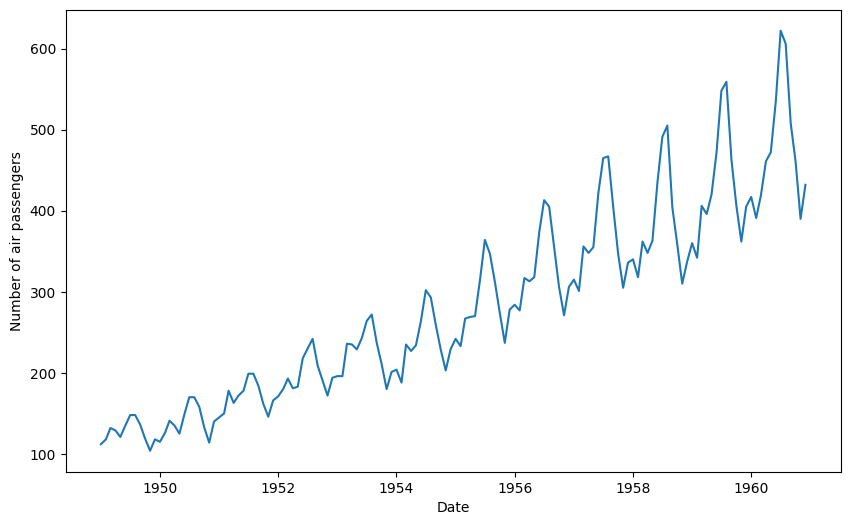

In [7]:
#plot graph
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexedDataset)

**Note: This data is not stationary as mean is changingor not constant.**

There are 2 ways to check for Stationarity of a TS: a) **Rolling Statistics** - Plot the moving avg or moving standard deviation to see if it varies with time. Its a visual technique.
b) **ADCF Test - Augmented Dickey–Fuller test** - It is used to gives us various values that can help in identifying stationarity. # The Null hypothesis says that a TS is non-stationary. It comprises of a Test Statistics & some critical # values for some confidence levels. If the Test statistics is less than the critical values, we can reject # the null hypothesis & say that the series is stationary. THE ADCF test also gives us a p-value. Acc to the # null hypothesis, lower values of p is better.    

# Rolling Statistics

In [8]:
# Determine rolling statistics
rolmean = indexedDataset.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


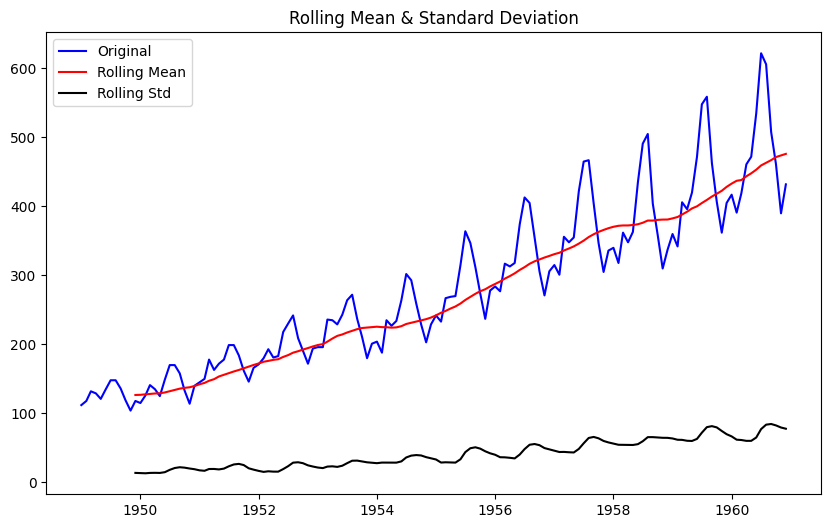

In [9]:
#Plot rolling statistics
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.

In [10]:
#Perform Augmented Dickey–Fuller test:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['#Passengers'], autolag='AIC') # AIC = It gives the info about what you want in TimeSeries
                                                                # (exact or actual values) and analysis the difference btw them 

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Note: For a Time series to be stationary, its ADCF test should have:  

    1. p-value to be low (according to the null hypothesis)  
    2. The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics  

From the above ADCF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is not stationary.  

## Data Transformation to achieve Stationarity

Our objective is to remove the trend component. Hence, flatter curves( ie: paralle to x-axis) for time series and rolling mean after taking log would say that our data transformation did a good job.

### 1. Log Scale Transformation

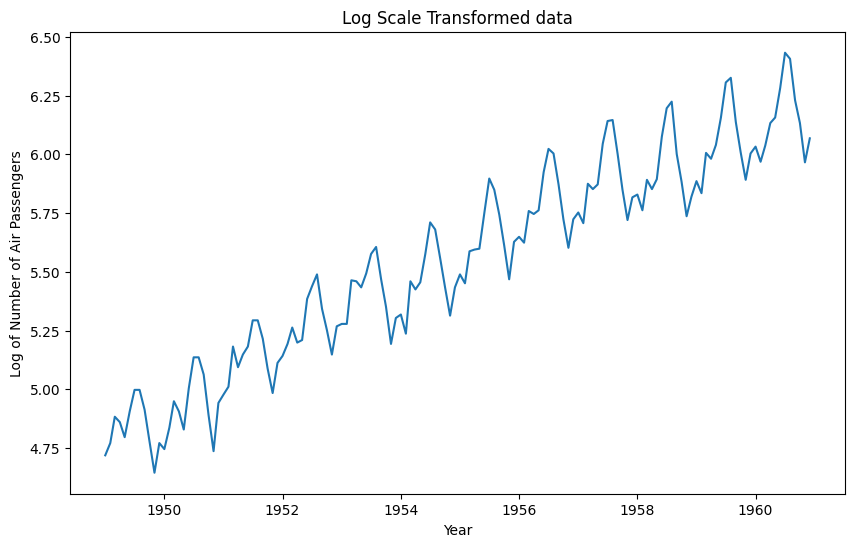

In [12]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.xlabel('Year')
plt.ylabel('Log of Number of Air Passengers')
plt.title('Log Scale Transformed data')
plt.plot(indexedDataset_logScale)

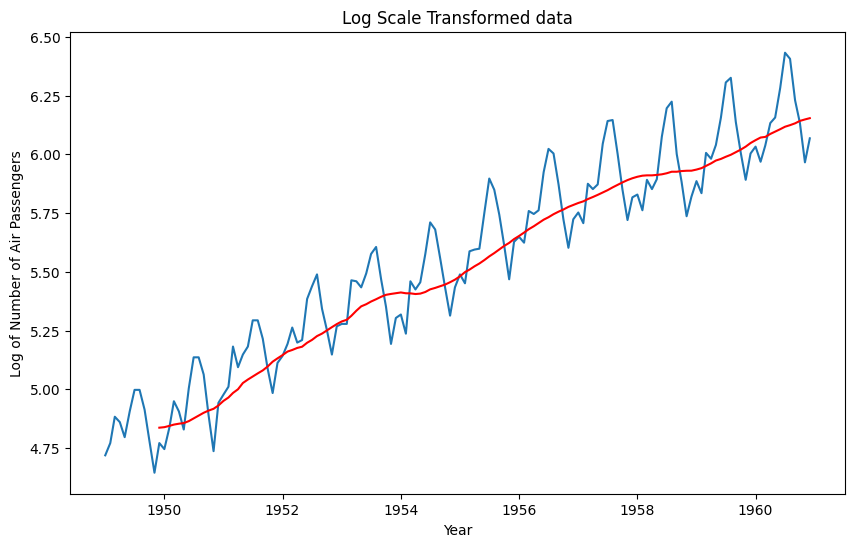

In [13]:
# The below transformation is required to make series stationary

movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.title('Rolling Mean & Standard Deviationfor Log Transformation')
plt.ylabel('Log of Number of Air Passengers')
plt.xlabel('Year')

plt.title('Log Scale Transformed data')
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

From above graph, we see that even though rolling mean is not stationary, it is still better than the previous case, where no transfromation were applied to series. 

We know from above graph that both the Time series with log scale as well as its moving average have a trend component. Thus we can apply a elementary intuition: subtraction one from the other should remove the trend component of both. Its like:  
    **_logscaleL_** = **_stationarypart(L1) + trend(LT)_**  
    **_movingAvgofLogscaleA_** = **_stationarypart(A1) + trend(AT)_**  
    **_resultseriesR_** = **_L - A = (L1 + LT) - (A1 + AT) = (L1 - A1) + (LT - AT)_**  


    
Since, L & A are series & it moving avg, their trend will be more or less same, Hence
LT-AT nearly equals to 0

Thus trend component will be almost removed. And we have,

**_R = L1-A1_** , our final non-trend curve


In [15]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


## Pipeline for testing Stationarity

In [17]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

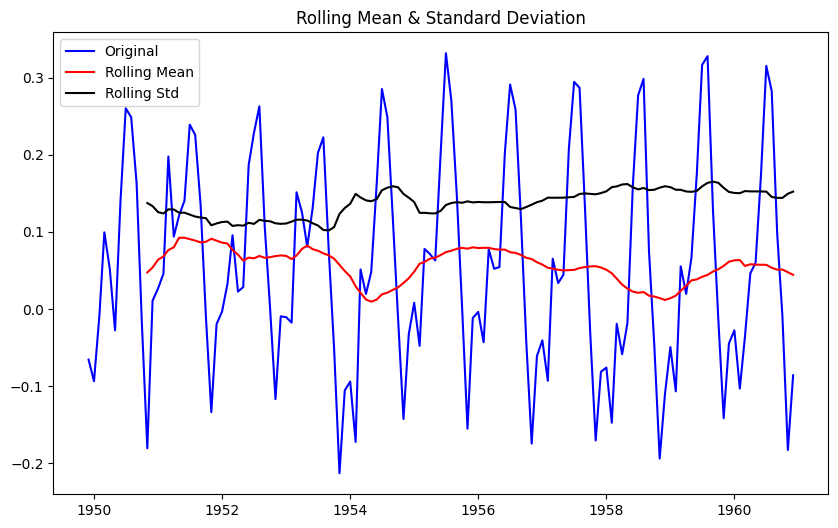

Results of Dickey Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [18]:
test_stationarity(datasetLogScaleMinusMovingAverage)


From above graph, we observe that our intuition that "subtracting two related series having similar trend components will make the result stationary" is true. We find that:

p-value has reduced from 0.99 to 0.022.
The critical values at 1%,5%,10% confidence intervals are pretty close to the Test Statistic.
Thus, from above 2 points, we can say that our given series is stationary.


## 2. Exponential Decay Transformation

 A quantity is subject to exponential decay if it decreases at a rate proportional to its current value. Symbolically, this process can be expressed by the following differential equation, where N is the quantity and λ (lambda) is a positive rate called the exponential decay constant:  

dN/dt=−λN  

The solution to this equation (see derivation below) is: N(t)=N0∗e−λt  

where N(t) is the quantity at time t, and N0 = N(0) is the initial quantity, i.e. the quantity at time t = 0.  

Half Life is the time required for the decaying quantity to fall to one half of its initial value. It is denoted by t1/2 . The half-life can be written in terms of the decay constant as:

t1/2=ln(2)/λ  

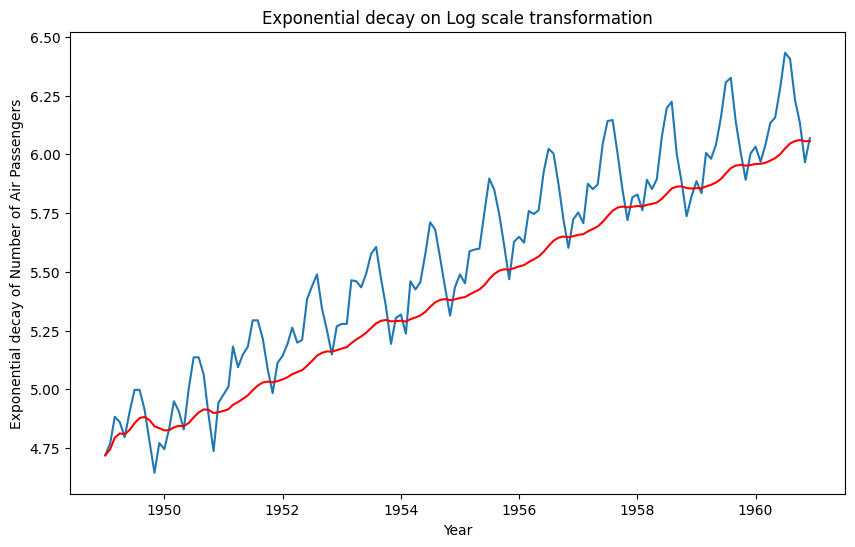

In [19]:
# Let us try out Exponential decay.
# Basically plotting exponential decay on log scale transformation only

exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.title('Exponential decay on Log scale transformation')
plt.xlabel('Year')
plt.ylabel('Exponential decay of Number of Air Passengers')

plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

From above graph, it seems that exponential decay is not holding any advantage over log scale as both the corresponding curves are similar. But, in statistics, inferences cannot be drawn simply by looking at the curves. Hence, we perform the ADCF test again on the decay series below.

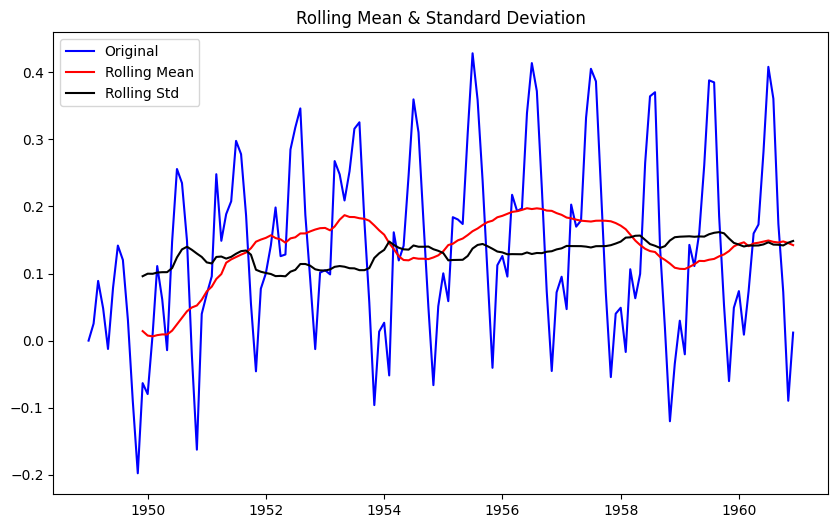

Results of Dickey Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [20]:
datasetLogScaleMinusExponentialMovingAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

We observe that the Time Series is stationary & also the series for moving avg & std. dev. is almost parallel to x-axis thus they also have no trend.
Also,  
    1. p-value has decreased from 0.022 to 0.005.   
    2. Test Statistic value is very much closer to the Critical values.  
    
Both the points say that our current transformation is better than the previous logarithmic transformation. Even though, we couldn't observe any differences by visually looking at the graphs, the tests confirmed decay to be much better.  

## 3. Time Shift Transformation

Given a set of observation on the time series:  

    1) x0,x1,x2,x3,....xn The shifted values will be:  
    2) null,x0,x1,x2,....xn <---- basically all xi's shifted by 1 pos to right  

Thus, the time series with time shifted values are:  
    null,(x1−x0),(x2−x1),(x3−x2),(x4−x3),....(xn−xn−1)  

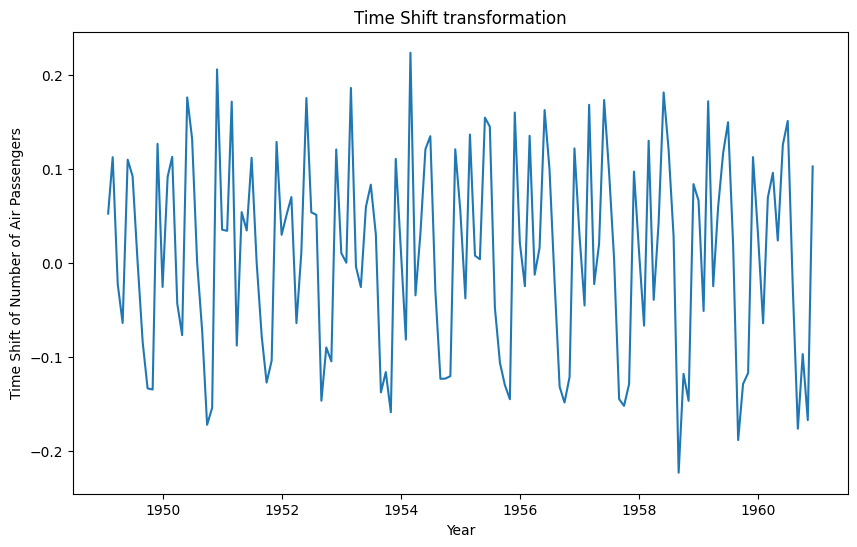

In [21]:
# Here the lag = 1, while shifting the Log scaled TS

datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.title('Time Shift transformation')
plt.xlabel('Year')
plt.ylabel('Time Shift of Number of Air Passengers')
plt.plot(datasetLogDiffShifting)

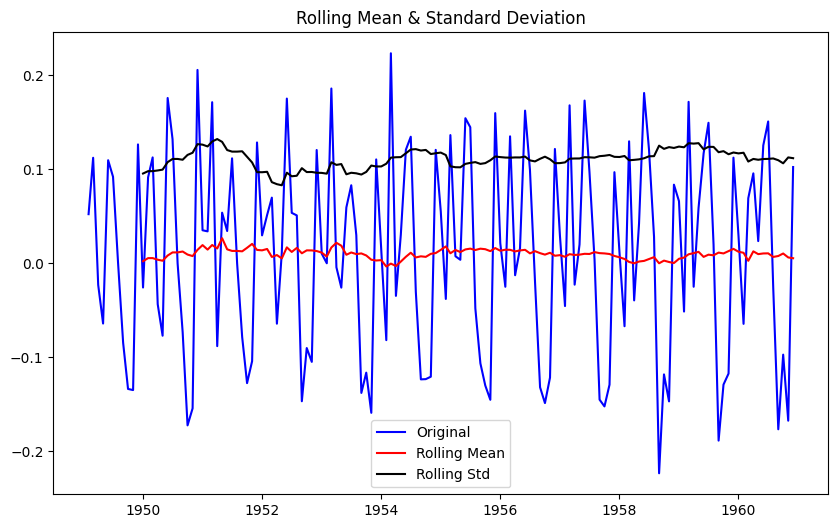

Results of Dickey Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [23]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

From above 2 graphs, we can see that, visually this is the best result as our series along with rolling statistic values of moving avg & moving std. dev. is very much flat & stationary. But, the ADCF test shows us that:  

    1. p-value of 0.07 is not as good as 0.005 of exponential decay.  
    2. Test Statistic value not as close to the critical values as that for exponential decay.  
    
We have thus tried out 3 different transformation: log, exp decay & time shift. For simplicity, we will go with the log scale. The reason for doing this is that we can revert back to the original scale during forecasting.  

Let us now break down the 3 components of the log scale series using a system libary function. Once, we separate our the components, we can simply ignore trend & seasonality and check on the nature of the residual part.  

## Let's focus on components of time-series now

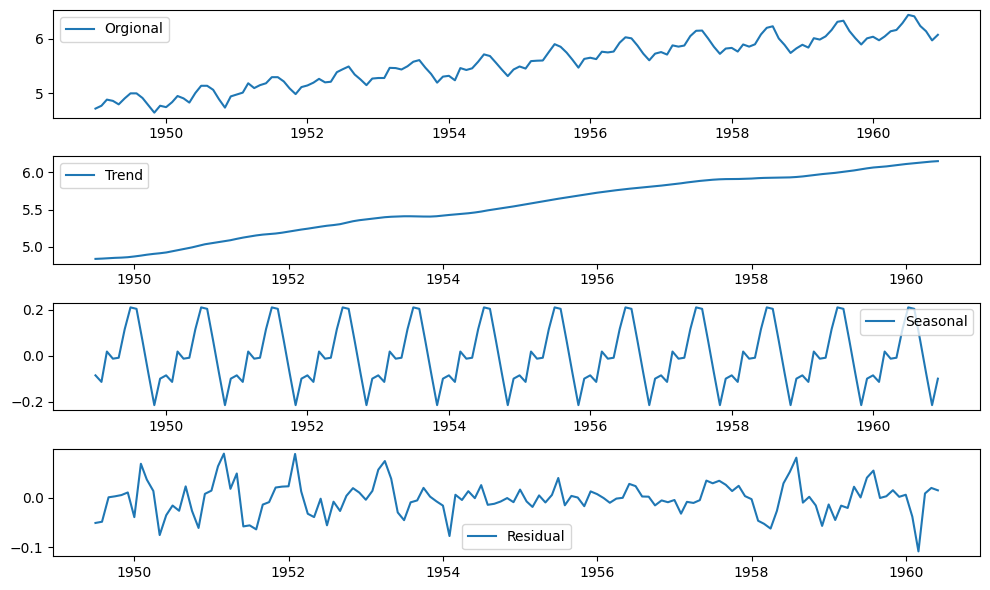

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Orgional')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

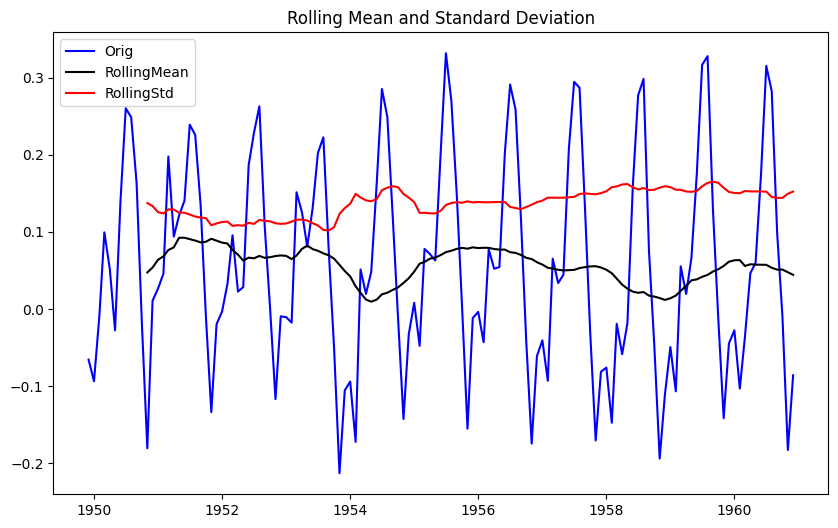

Results of Dickey-fuller test:
Test Statistics                -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of Observation used    119.000000
Critical Values (1%)           -3.486535
Critical Values (5%)           -2.886151
Critical Values (10%)          -2.579896
dtype: float64


In [66]:
# Check noise
decompomposedLogData = residual
decompomposedLogData.dropna(inplace=True)
test_stationarity(datasetLogScaleMinusMovingAverage)

# Plotting ACF & PACF

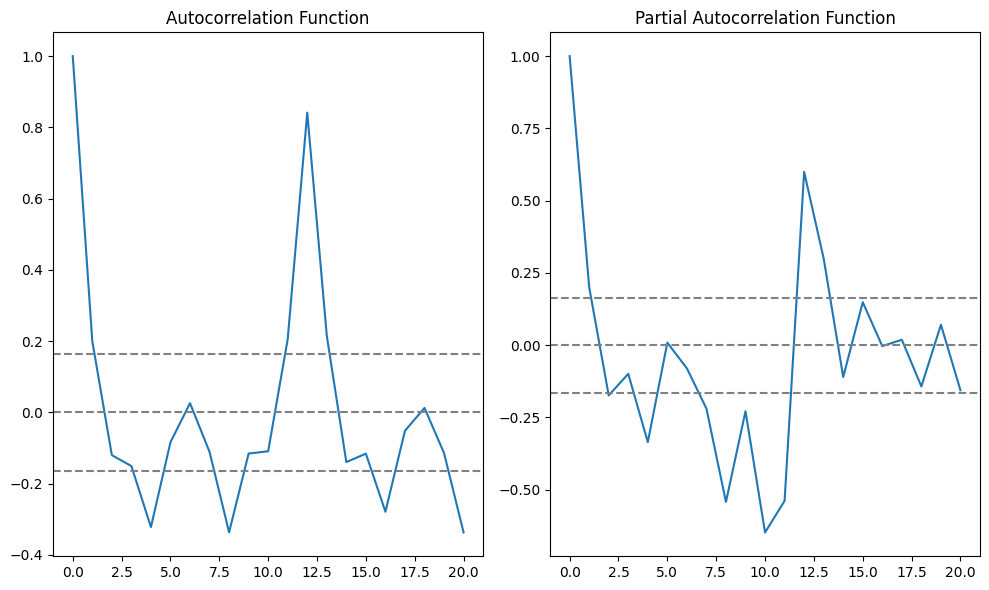

In [27]:
#ACF & PACF plots
from statsmodels.tsa.stattools import acf, pacf 

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

From the ACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, Q = 2 From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, P = 2  
ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models will give a value of RSS. Lower RSS values indicate a better model.  

## Building Models

ARIMA model is a combination of 3 models :  

    AR (p) : Auto Regressive  
    I (d) : Integrated  
    MA (q) : Moving Average (p,d,q) is known as the order of the ARIMA model. Values of these parameters are based on the above mentioned models.  
    
p : Number of auto regressive terms.  
d : Number of differencing orders required to make the time series stationary.  
q : Number of lagged forecast errors in the prediction equation. 

Selection criteria for the order of ARIMA model :  
p : Lag value where the Partial Autocorrelation (PACF) graph cuts off or drops to 0 for the 1st instance.   
d : Number of times differencing is carried out to make the time series stationary.  
q : Lag value where the Autocorrelation (ACF) graph crosses the upper confidence interval for the 1st instance. 

In [48]:
import warnings

warnings.filterwarnings("ignore")

##from statsmodels.tsa.arima.model import ARIMA

import statsmodels.api as smapi

model = smapi.tsa.arima.ARIMA(indexedDataset_logScale, order=(2,1,0))

result = model.fit()


Plotting AR model


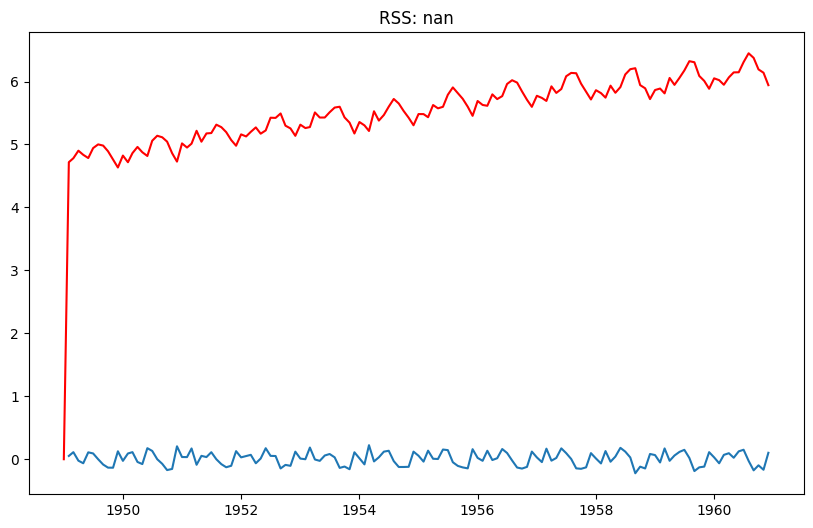

In [51]:
#AR Model
#making order=(2,1,0) gives RSS=1.5023
#model = ARIMA(indexedDataset_logScale, order=(2,1,0))
results_AR = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))

print('Plotting AR model')

Plotting MA model


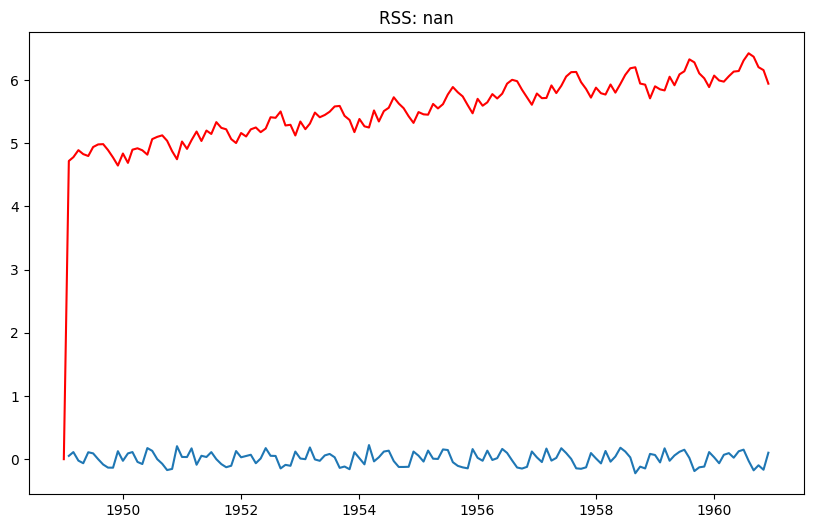

In [53]:
#MA Model
model = smapi.tsa.arima.ARIMA(indexedDataset_logScale, order=(0,1,2))
results_MA = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))

print('Plotting MA model')

 #AR+I+MA = ARIMA model

model = smapi.tsa.arima.ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
plt.xlabel('Year')
plt.ylabel('Log Scale for Number of Air Passengers')
print('Plotting ARIMA model')

By combining AR & MA into ARIMA, we see that RSS value has decreased from either case to 1.0292, indicating ARIMA to be better than its individual component models.  

With the ARIMA model built, we will now generate predictions. But, before we do any plots for predictions ,we need to reconvert the predictions back to original form. This is because, our model was built on log transformed data. 

# Prediction & Reverse Transformation

In [57]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776385
1949-04-01    4.883216
1949-05-01    4.824422
dtype: float64


In [58]:
#Convert to cumulative sum

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Month
1949-01-01      0.000000
1949-02-01      4.718499
1949-03-01      9.494884
1949-04-01     14.378101
1949-05-01     19.202522
                 ...    
1960-08-01    765.821260
1960-09-01    772.162700
1960-10-01    778.339888
1960-11-01    784.481851
1960-12-01    790.426421
Length: 144, dtype: float64


In [59]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01     4.718499
1949-02-01     9.436998
1949-03-01    14.213383
1949-04-01    19.096600
1949-05-01    23.921021
dtype: float64

In [61]:
indexedDataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398
